# ARRHYTMIA DATASET CLASSIFICATION

In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Data Exploration

### Importing Data

In [2]:
import os
print(os.listdir("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/"))

mitbih_df_train = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/mitbih_train.csv", header=None)
mitbih_df_test = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/mitbih_test.csv", header=None)
mitbih_df = pd.concat([mitbih_df_train, mitbih_df_test], axis=0)

['mitbih_train.csv', 'mitbih_test.csv', 'ptbdb_normal.csv', 'ptbdb_abnormal.csv']


### Data Exploring

In [3]:
mean_mitbih_df = mitbih_df.groupby(187).mean()
X_mean_mitbih_model = mean_mitbih_df.values[:, :]


### Extract classes and atributes

In [4]:
X_mitbih_model = mitbih_df.values[:, :-1]
y_mitbih_model = mitbih_df.values[:, -1].astype(int)

### Exploratory Visualization

#### Data by class

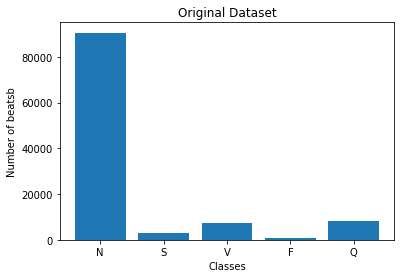

Sizes classes original dataset: [N: 90589, S: 2779, V: 7236, F: 803, Q: 8039]


In [5]:
N = np.argwhere(y_mitbih_model == 0).flatten()
S = np.argwhere(y_mitbih_model == 1).flatten()
V = np.argwhere(y_mitbih_model == 2).flatten()
F = np.argwhere(y_mitbih_model == 3).flatten()
Q = np.argwhere(y_mitbih_model == 4).flatten()

x = np.arange(5)
plt.bar(x,[len(N), len(S), len(V), len(F), len(Q)])
plt.title("Original Dataset")
plt.xticks(x, ('N', 'S', 'V', 'F', 'Q'))
plt.xlabel("Classes")
plt.ylabel("Number of beatsb")
plt.show()

print("Sizes classes original dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N),len(S),len(V),len(F),len(Q)))

#### Mean example visualization by class

Text(0, 0.5, 'Amplitude')

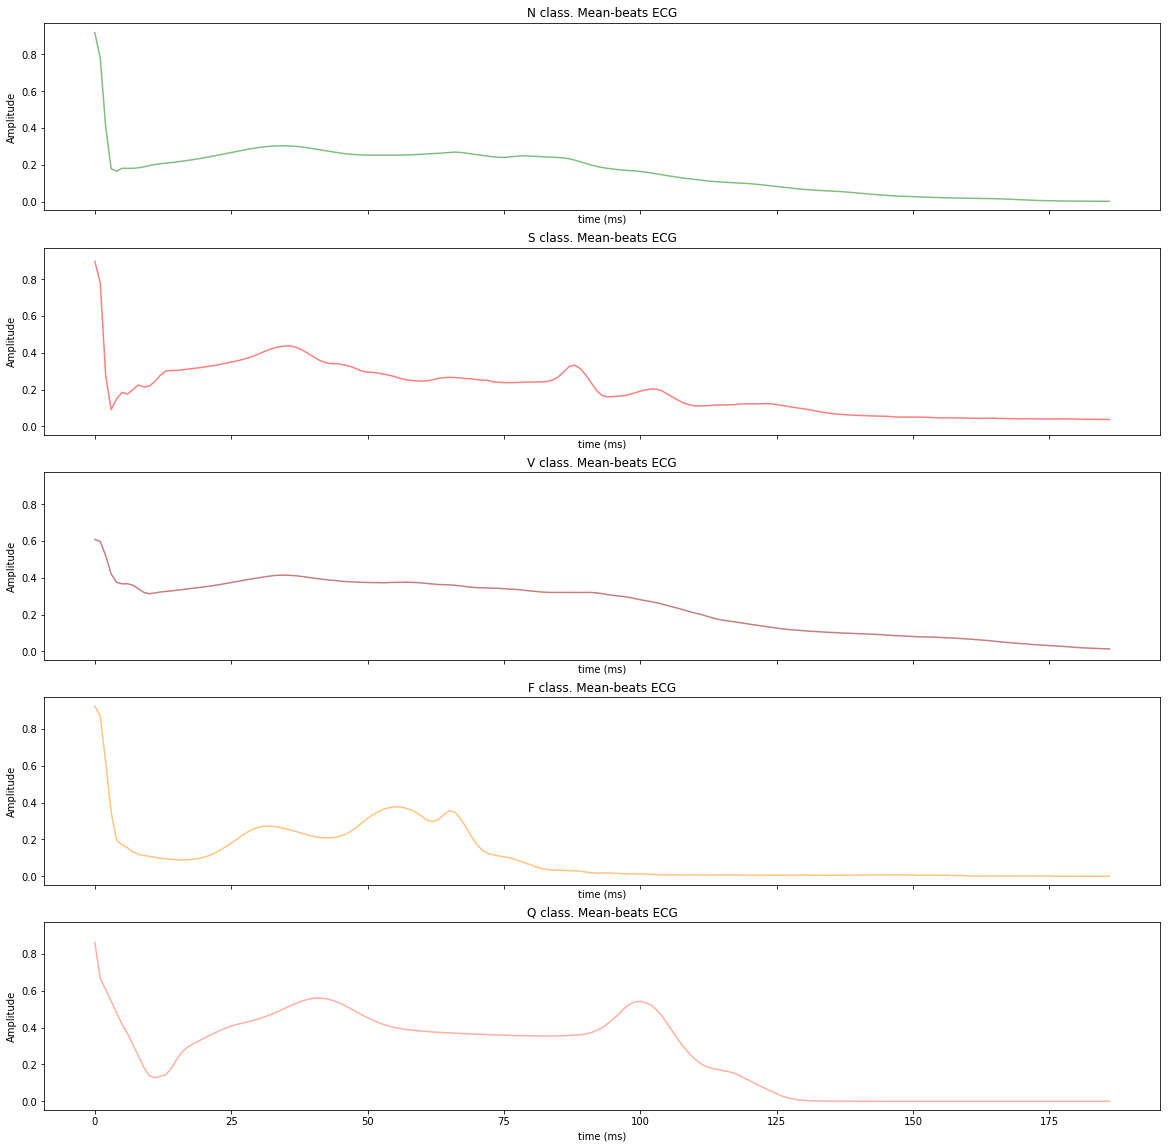

In [6]:
f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(20,20))

ax[0].set_title("N class. Mean-beats ECG")
ax[0].plot(X_mean_mitbih_model[0, :], color="green", alpha=.5)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Amplitude')

ax[1].set_title("S class. Mean-beats ECG")
ax[1].plot(X_mean_mitbih_model[1, :], color="red", alpha=.5)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Amplitude')

ax[2].set_title("V class. Mean-beats ECG")
ax[2].plot(X_mean_mitbih_model[2, :], color="darkred", alpha=.5)
ax[2].set_xlabel('time (ms)')
ax[2].set_ylabel('Amplitude')

ax[3].set_title("F class. Mean-beats ECG")
ax[3].plot(X_mean_mitbih_model[3, :], color="darkorange", alpha=.5)
ax[3].set_xlabel('time (ms)')
ax[3].set_ylabel('Amplitude')

ax[4].set_title("Q class. Mean-beats ECG")
ax[4].plot(X_mean_mitbih_model[4, :], color="tomato", alpha=.5)
ax[4].set_xlabel('time (ms)')
ax[4].set_ylabel('Amplitude')

#### 10 examples visualization by class

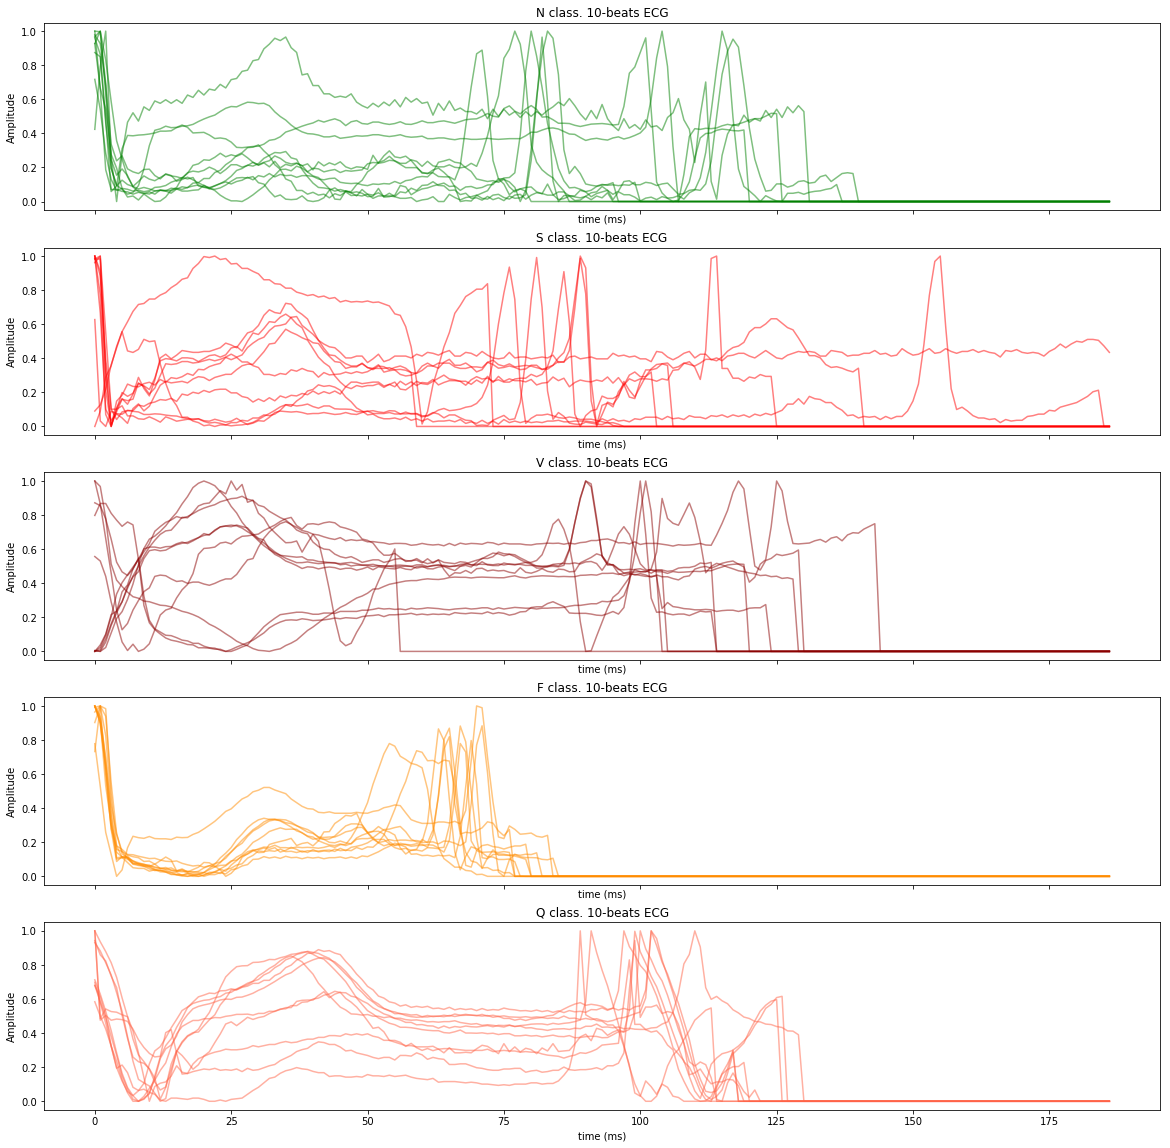

In [7]:
plots_per_class=10

f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(20,20))

for j in range(plots_per_class):
    ax[0].set_title("N class. {}-beats ECG".format(plots_per_class))
    ax[0].plot(X_mitbih_model[N, :][j], color="green", alpha=.5)
    ax[0].set_xlabel('time (ms)')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].set_title("S class. {}-beats ECG".format(plots_per_class))
    ax[1].plot(X_mitbih_model[S, :][j], color="red", alpha=.5)
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('Amplitude')
    
    ax[2].set_title("V class. {}-beats ECG".format(plots_per_class))
    ax[2].plot(X_mitbih_model[V, :][j], color="darkred", alpha=.5)
    ax[2].set_xlabel('time (ms)')
    ax[2].set_ylabel('Amplitude')

    ax[3].set_title("F class. {}-beats ECG".format(plots_per_class))
    ax[3].plot(X_mitbih_model[F, :][j], color="darkorange", alpha=.5)
    ax[3].set_xlabel('time (ms)')
    ax[3].set_ylabel('Amplitude')

    ax[4].set_title("Q class. {}-beats ECG".format(plots_per_class))
    ax[4].plot(X_mitbih_model[Q, :][j], color="tomato", alpha=.5)
    ax[4].set_xlabel('time (ms)')
    ax[4].set_ylabel('Amplitude')



#### Visual comparison between an example by class

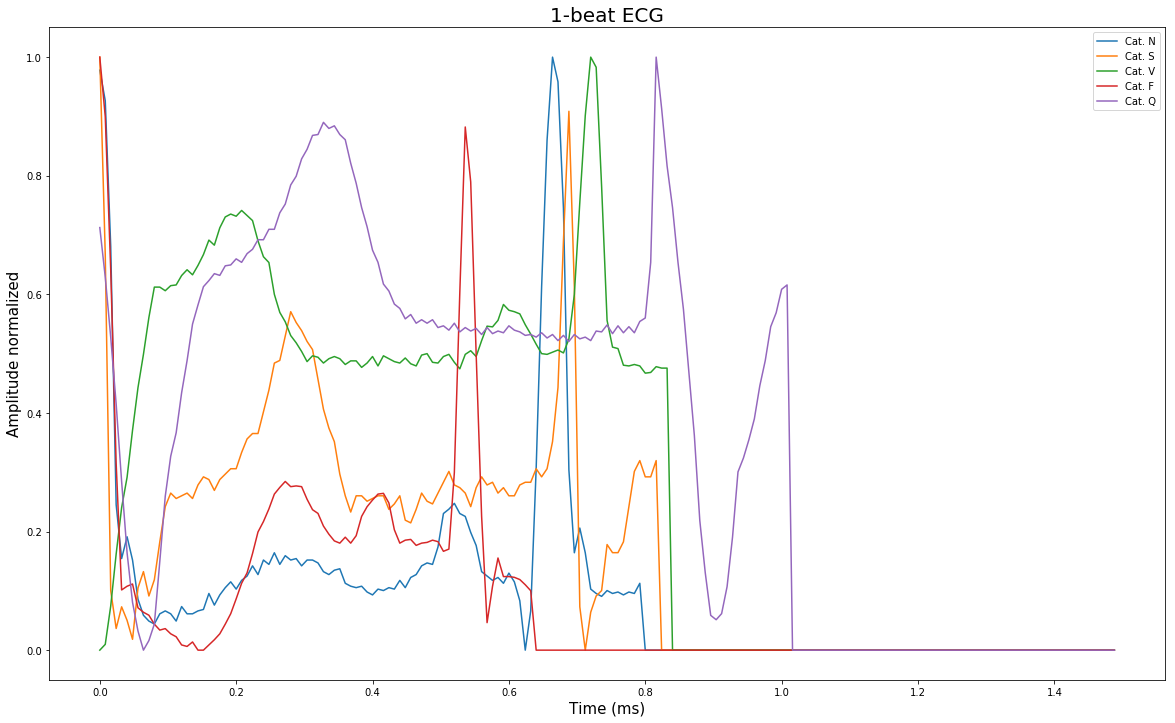

In [8]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X_mitbih_model[N, :][0], label="Cat. N")
plt.plot(x, X_mitbih_model[S, :][0], label="Cat. S")
plt.plot(x, X_mitbih_model[V, :][0], label="Cat. V")
plt.plot(x, X_mitbih_model[F, :][0], label="Cat. F")
plt.plot(x, X_mitbih_model[Q, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude normalized", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

## Preprocessing Data

### Split data into training and testing dataset

In [9]:
from preprocess_data import train_testbalanced_split

model = 0
classes = [N, S, V, F, Q]
test_size = 0.005 #Measured in the complete dataset
random_state = 42

X_train_mitbih_model, X_test_mitbih_model, y_train_mitbih_model, y_test_mitbih_model = train_testbalanced_split(X_mitbih_model, y_mitbih_model, model, classes, test_size, random_state)

print("X_train", X_train_mitbih_model.shape)
print("y_train", y_train_mitbih_model.shape)
print("X_test", X_test_mitbih_model.shape)
print("y_test", y_test_mitbih_model.shape)

X_train (106968, 187)
y_train (106968,)
X_test (2735, 187)
y_test (2735,)


Sizes classes original dataset: [N: 90589, S: 2779, V: 7236, F: 803, Q: 8039]
Sizes classes training dataset: [N: 90042, S: 2291, V: 6708, F: 414, Q: 7513]
Sizes classes testing dataset: [N: 547, S: 547, V: 547, F: 547, Q: 547]


<BarContainer object of 5 artists>

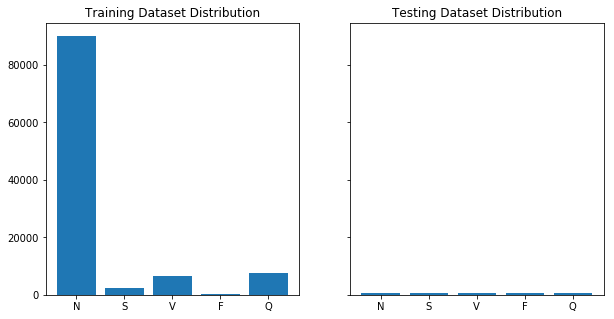

In [10]:
N_test = np.argwhere(y_test_mitbih_model == 0).flatten()
S_test = np.argwhere(y_test_mitbih_model == 1).flatten()
V_test = np.argwhere(y_test_mitbih_model == 2).flatten()
F_test = np.argwhere(y_test_mitbih_model == 3).flatten()
Q_test = np.argwhere(y_test_mitbih_model == 4).flatten()


N_train = np.argwhere(y_train_mitbih_model == 0).flatten()
S_train = np.argwhere(y_train_mitbih_model == 1).flatten()
V_train = np.argwhere(y_train_mitbih_model == 2).flatten()
F_train = np.argwhere(y_train_mitbih_model == 3).flatten()
Q_train = np.argwhere(y_train_mitbih_model == 4).flatten()

print("Sizes classes original dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N),len(S),len(V),len(F),len(Q)))
print("Sizes classes training dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_train),len(S_train),len(V_train),len(F_train),len(Q_train)))
print("Sizes classes testing dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_test),len(S_test),len(V_test),len(F_test),len(Q_test)))


f, ax = plt.subplots(1, 2, sharey=True, figsize=(10 ,5))
ax[0].set_title("Training Dataset Distribution")
ax[0].bar(('N', 'S', 'V', 'F', 'Q'), [len(N_train), len(S_train), len(V_train), len(F_train), len(Q_train)])
ax[1].set_title("Testing Dataset Distribution")
ax[1].bar(('N', 'S', 'V', 'F', 'Q'), [len(N_test), len(S_test), len(V_test), len(F_test), len(Q_test)])

### Data balance algorithm

In [11]:
from preprocess_data import data_augmentation
from imblearn.under_sampling import RandomUnderSampler

X_train_mitbih_model, y_train_mitbih_model = data_augmentation(X_train_mitbih_model, y_train_mitbih_model, X_train_mitbih_model[F_train], 'F', 16)
X_train_mitbih_model, y_train_mitbih_model = data_augmentation(X_train_mitbih_model, y_train_mitbih_model, X_train_mitbih_model[S_train], 'S', 2)

rus = RandomUnderSampler(sampling_strategy='all')
X_train_mitbih_model, y_train_mitbih_model = rus.fit_resample(X_train_mitbih_model, y_train_mitbih_model)

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1743: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1745: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


Old sizes classes dataset: [N: 90042, S: 2291, V: 6708, F: 414, Q: 7513]
New sizes classes dataset: [N: 6708, S: 6708, V: 6708, F: 6708, Q: 6708]


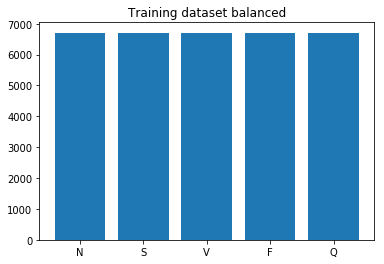

In [12]:
N_new_train = np.argwhere(y_train_mitbih_model == 0).flatten()
S_new_train = np.argwhere(y_train_mitbih_model == 1).flatten()
V_new_train = np.argwhere(y_train_mitbih_model == 2).flatten()
F_new_train = np.argwhere(y_train_mitbih_model == 3).flatten()
Q_new_train = np.argwhere(y_train_mitbih_model == 4).flatten()

print("Old sizes classes dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_train),len(S_train),len(V_train),len(F_train),len(Q_train)))
print("New sizes classes dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_new_train),len(S_new_train),len(V_new_train),len(F_new_train),len(Q_new_train)))

x = np.arange(5)
plt.bar(x,[len(N_new_train), len(S_new_train), len(V_new_train), len(F_new_train), len(Q_new_train)])
plt.title("Training dataset balanced")
plt.xticks(x, ('N', 'S', 'V', 'F', 'Q'))
plt.show()

#### Signal Stretching

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1743: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1745: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


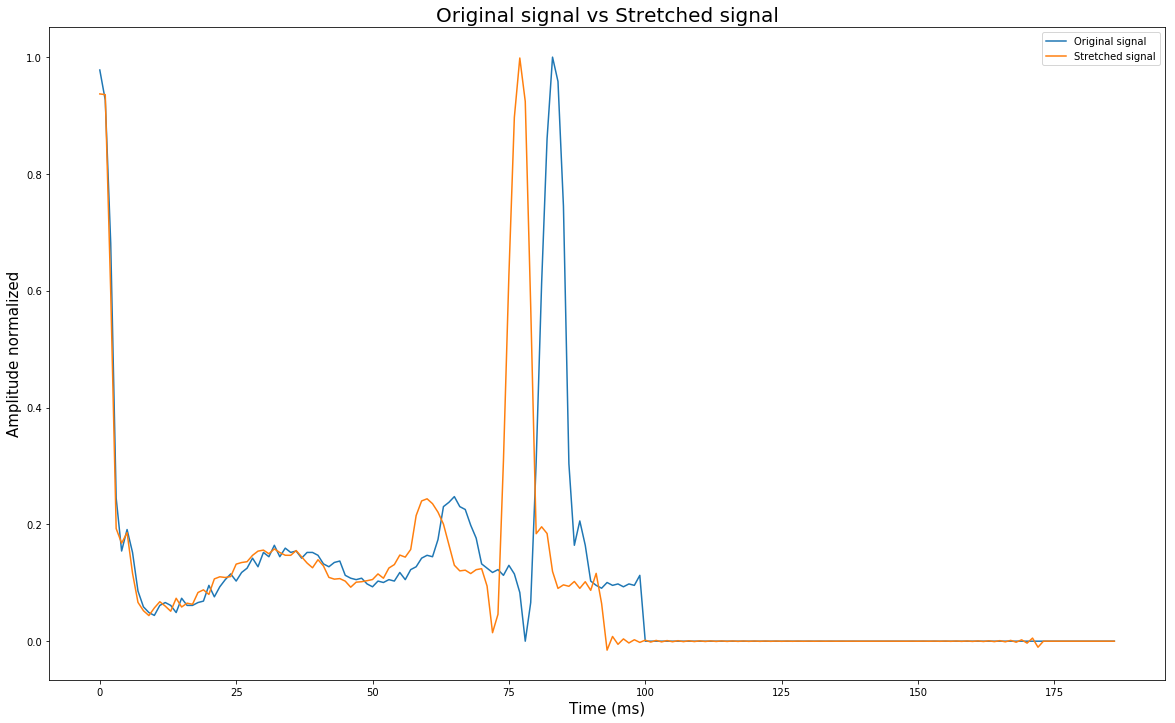

In [13]:
from preprocess_data import stretch

plt.figure(figsize=(20,12))
plt.plot(X_mitbih_model[0, :], label="Original signal")
plt.plot(stretch(X_mitbih_model[0, :]), label="Stretched signal")
plt.legend()
plt.title("Original signal vs Stretched signal", fontsize=20)
plt.ylabel("Amplitude normalized", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

#### Signal Amplification

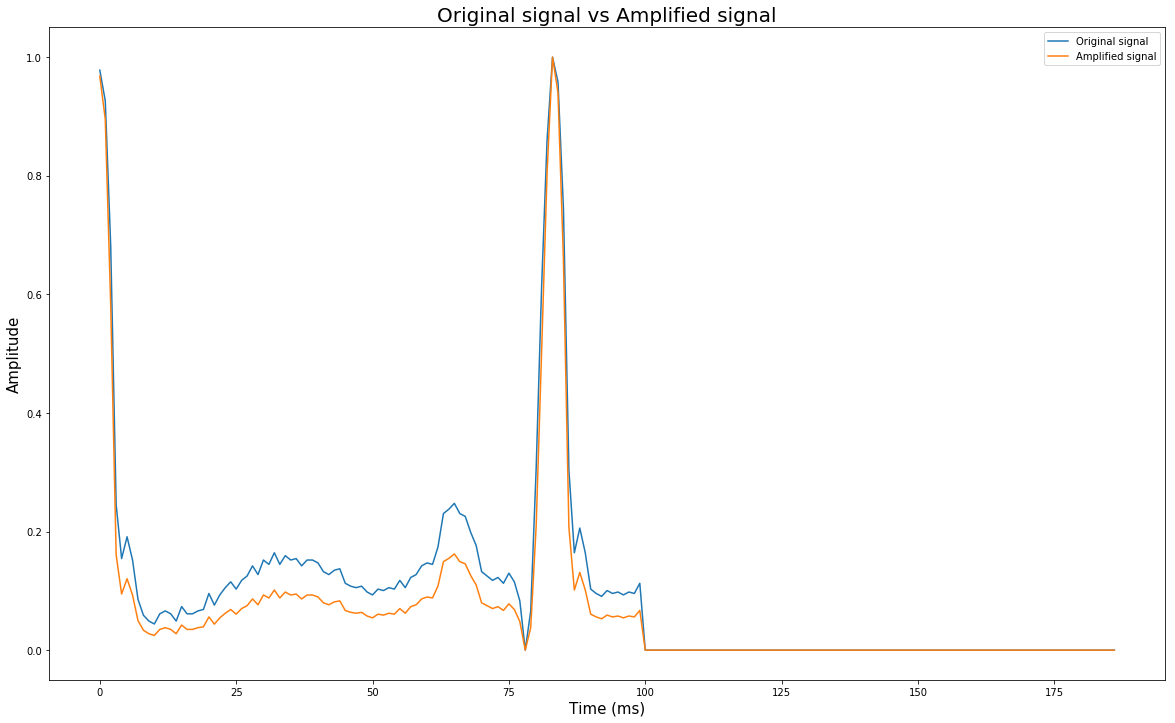

In [14]:
from preprocess_data import amplify

plt.figure(figsize=(20,12))
plt.plot(X_mitbih_model[0, :], label="Original signal")
plt.plot(amplify(X_mitbih_model[0, :]), label="Amplified signal")
plt.legend()
plt.title("Original signal vs Amplified signal", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

### Split training dataset into training and validation dataset

In [15]:
from sklearn.model_selection import train_test_split

valid_size = 0.05
X_train_mitbih_model, X_valid_mitbih_model, y_train_mitbih_model, y_valid_mitbih_model = train_test_split(X_train_mitbih_model, y_train_mitbih_model, test_size=valid_size, random_state=random_state)

Sizes classes original dataset: [N: 90589, S: 2779, V: 7236, F: 803, Q: 8039]
Sizes classes training dataset: [N: 6353, S: 6381, V: 6345, F: 6385, Q: 6399]
Sizes classes testing dataset: [N: 547, S: 547, V: 547, F: 547, Q: 547]


<BarContainer object of 5 artists>

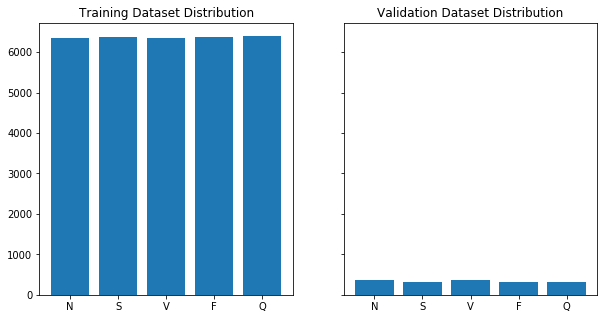

In [16]:
N_valid = np.argwhere(y_valid_mitbih_model == 0).flatten()
S_valid = np.argwhere(y_valid_mitbih_model == 1).flatten()
V_valid = np.argwhere(y_valid_mitbih_model == 2).flatten()
F_valid = np.argwhere(y_valid_mitbih_model == 3).flatten()
Q_valid = np.argwhere(y_valid_mitbih_model == 4).flatten()

N_train_final = np.argwhere(y_train_mitbih_model == 0).flatten()
S_train_final = np.argwhere(y_train_mitbih_model == 1).flatten()
V_train_final = np.argwhere(y_train_mitbih_model == 2).flatten()
F_train_final = np.argwhere(y_train_mitbih_model == 3).flatten()
Q_train_final = np.argwhere(y_train_mitbih_model == 4).flatten()

print("Sizes classes original dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N),len(S),len(V),len(F),len(Q)))
print("Sizes classes training dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_train_final),len(S_train_final),len(V_train_final),len(F_train_final),len(Q_train_final)))
print("Sizes classes testing dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N_test),len(S_test),len(V_test),len(F_test),len(Q_test)))


f, ax = plt.subplots(1, 2, sharey=True, figsize=(10 ,5))
ax[0].set_title("Training Dataset Distribution")
ax[0].bar(('N', 'S', 'V', 'F', 'Q'), [len(N_train_final), len(S_train_final), len(V_train_final), len(F_train_final), len(Q_train_final)])
ax[1].set_title("Validation Dataset Distribution")
ax[1].bar(('N', 'S', 'V', 'F', 'Q'), [len(N_valid), len(S_valid), len(V_valid), len(F_valid), len(Q_valid)])

## Implementation: 1D CNN + NN model

### Preprocess data for input to the Neural Network

In [17]:
from preprocess_data import preprocess_input
X_train_mitbih_model_nn, X_valid_mitbih_model_nn, X_test_mitbih_model_nn, y_train_mitbih_model_nn, y_valid_mitbih_model_nn, y_test_mitbih_model_nn = preprocess_input(X_train_mitbih_model, X_valid_mitbih_model, X_test_mitbih_model, y_train_mitbih_model, y_valid_mitbih_model, y_test_mitbih_model)


/home/fylgja/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Model

In [18]:
from ecg_models import extract_bottleneck_features, full_connect_NN
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Activation, Dense, Softmax, BatchNormalization

extract_features = extract_bottleneck_features(X_train=X_train_mitbih_model_nn)
mitbih_model = full_connect_NN(extract_features, 5)

mitbih_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 64)                51712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
_________________________________________________________________
softmax_1 (Softmax)          (None, 5)                 0         
Total params: 54,213
Trainable params: 54,085
Non-trainable params: 128
_________________________________________________________________


### Training

In [19]:
from keras.optimizers import Adam
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
mitbih_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

epochs = 100
batch_size = 500

checkpointer = ModelCheckpoint(filepath='saved_models/mitbih_model/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

lrate = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.0001)

early = EarlyStopping(monitor="val_loss", mode="min", patience=25)

callbacks_list = [checkpointer, lrate, early]

mitbih_model.fit(X_train_mitbih_model_nn, y_train_mitbih_model_nn,
          epochs=epochs, batch_size=batch_size, verbose=1, 
          validation_data=(X_valid_mitbih_model_nn, y_valid_mitbih_model_nn), 
          callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 31863 samples, validate on 1677 samples
Epoch 1/100
31863/31863 [==============================] - 18s 553us/step - loss: 0.6780 - acc: 0.7624 - val_loss: 0.6723 - val_acc: 0.7501

Epoch 00001: val_loss improved from inf to 0.67235, saving model to saved_models/mitbih_model/weights.best.from_scratch.hdf5
Epoch 2/100
31863/31863 [==============================] - 18s 568us/step - loss: 0.3676 - acc: 0.8742 - val_loss: 0.5110 - val_acc: 0.8205

Epoch 00002: val_loss improved from 0.67235 to 0.51104, saving model to saved_models/mitbih_model/weights.best.from_scratch.hdf5
Epoch 3/100
31863/31863 [==============================] - 18s 552us/step - loss: 0.2864 - acc: 0.9021 - val_loss: 0.3796 - val_acc: 0.8646

Epoch 00003: val_loss improved from 0.51104 to 0.37958, saving model to saved_models/mitbih_model/weights.best.from_scratch.hdf5
Epoch 4/100
31863/31863 [==============================] - 20s 631us/step - loss: 0.2403 - acc: 0

31863/31863 [==============================] - 18s 553us/step - loss: 0.0488 - acc: 0.9850 - val_loss: 0.1358 - val_acc: 0.9618

Epoch 00038: val_loss did not improve from 0.11378
Epoch 39/100
31863/31863 [==============================] - 18s 579us/step - loss: 0.0503 - acc: 0.9843 - val_loss: 0.1649 - val_acc: 0.9529

Epoch 00039: val_loss did not improve from 0.11378
Epoch 40/100
31863/31863 [==============================] - 19s 601us/step - loss: 0.0472 - acc: 0.9849 - val_loss: 0.1369 - val_acc: 0.9618

Epoch 00040: val_loss did not improve from 0.11378
Epoch 41/100
31863/31863 [==============================] - 18s 568us/step - loss: 0.0456 - acc: 0.9849 - val_loss: 0.1438 - val_acc: 0.9577

Epoch 00041: val_loss did not improve from 0.11378
Epoch 42/100
31863/31863 [==============================] - 19s 586us/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.2021 - val_acc: 0.9457

Epoch 00042: val_loss did not improve from 0.11378
Epoch 43/100
31863/31863 [======================

### Evaluation and Validation

In [21]:
mitbih_model.load_weights('saved_models/mitbih_model/weights.best.from_scratch.hdf5')
y_pred_mitbih_model = mitbih_model.predict(X_test_mitbih_model_nn, batch_size=1000)
pred_Y_cat_mitbih_model = np.argmax(y_pred_mitbih_model,-1)
test_Y_cat_mitbih_model = np.argmax(y_test_mitbih_model_nn.toarray(), -1)

              precision    recall  f1-score   support

           N       0.83      0.98      0.90       547
           S       0.98      0.88      0.93       547
           V       0.89      0.96      0.92       547
           F       0.98      0.81      0.89       547
           Q       0.99      0.99      0.99       547

   micro avg       0.93      0.93      0.93      2735
   macro avg       0.93      0.93      0.93      2735
weighted avg       0.93      0.93      0.93      2735



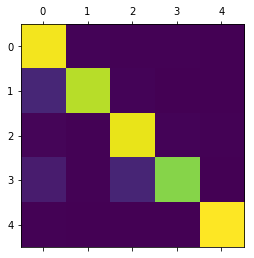

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
plt.matshow(confusion_matrix(test_Y_cat_mitbih_model, pred_Y_cat_mitbih_model))
print(classification_report(test_Y_cat_mitbih_model, pred_Y_cat_mitbih_model, target_names=['N','S','V','F','Q']))

In [23]:
from sklearn.metrics import accuracy_score
print("Average accuracy : {:.3f}".format(accuracy_score(test_Y_cat_mitbih_model, pred_Y_cat_mitbih_model)))

Average accuracy : 0.926


In [24]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(y_test_mitbih_model_nn.todense(), y_pred_mitbih_model)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(y_test_mitbih_model_nn.todense(), y_pred_mitbih_model)))
print("Coverage_error : {:.3f}".format(coverage_error(y_test_mitbih_model_nn.todense(), y_pred_mitbih_model)))

ranking-based average precision : 0.958
Ranking loss : 0.027
Coverage_error : 1.109


## Implementation: 1D CNN + SVM model

### Model

In [25]:
from sklearn.svm import SVC

train_features = extract_features.predict(X_train_mitbih_model_nn)

svm = SVC(gamma='scale')

### Training

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
parameters = {'kernel':('linear', 'rbf'), 'C':list(range(55,65))}
scorer = make_scorer(recall_score)

gridsearch_mitbih_svm = GridSearchCV(svm, parameters, cv=5)
gridsearch_mitbih_svm.fit(train_features, y_train_mitbih_model)

mitbih_model_svm = gridsearch_mitbih_svm.best_estimator_

mitbih_model_svm.fit(train_features, y_train_mitbih_model)

SVC(C=61, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
mitbih_model_svm = SVC(C=55, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mitbih_model_svm.fit(train_features, y_train_mitbih_model)

SVC(C=55, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluation and Validation

In [28]:
from sklearn.metrics import accuracy_score

test_features = extract_features.predict(X_test_mitbih_model_nn)
y_pred_mitbih_model_svm = mitbih_model_svm.predict(test_features)

              precision    recall  f1-score   support

           N       0.89      0.96      0.92       547
           S       0.97      0.92      0.94       547
           V       0.88      0.97      0.92       547
           F       0.98      0.85      0.91       547
           Q       0.99      0.99      0.99       547

   micro avg       0.94      0.94      0.94      2735
   macro avg       0.94      0.94      0.94      2735
weighted avg       0.94      0.94      0.94      2735



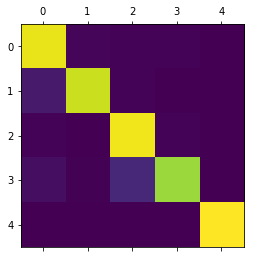

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

pred_Y_cat_mitbih_model_svm = y_pred_mitbih_model_svm
test_Y_cat_mitbih_model_svm = np.argmax(y_test_mitbih_model_nn.toarray(), -1)

plt.matshow(confusion_matrix(test_Y_cat_mitbih_model_svm, pred_Y_cat_mitbih_model_svm))
print(classification_report(test_Y_cat_mitbih_model_svm, pred_Y_cat_mitbih_model_svm, target_names=['N','S','V','F','Q']))

In [30]:
from sklearn.metrics import accuracy_score
print("Average accuracy : {:.3f}".format(accuracy_score(test_Y_cat_mitbih_model_svm, pred_Y_cat_mitbih_model_svm)))

Average accuracy : 0.938


## Free-Form Visualization

In [31]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(train_features)

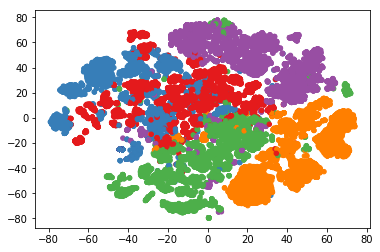

In [32]:
CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(5)]
NAME_DIC = {k:v for k,v in zip([0,1,2,3,4],['N','S','V','F','Q'])}
color=[COLOR[int(y)] for y in y_train_mitbih_model]
markersizes = [20 for _ in range(train_features.shape[0])]

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=CMAP, s=markersizes)

# PTB DIAGNOSTIC ECG DATABASE CLASSIFICATION

## Data Exploration

### Importing Data

In [33]:
import os
print(os.listdir("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/"))

ptbdb_normal_df = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/ptbdb_normal.csv", header=None)
ptbdb_abnormal_df = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/ptbdb_abnormal.csv", header=None)
ptbdb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], axis=0)

['mitbih_train.csv', 'mitbih_test.csv', 'ptbdb_normal.csv', 'ptbdb_abnormal.csv']


### Extract classes and atributes

In [34]:
X_ptbdb_model = ptbdb_df.values[:, :-1]
y_ptbdb_model = ptbdb_df.values[:, -1].astype(int)

### Data Exploring

In [35]:
mean_ptbdb_df = ptbdb_df.groupby(187).mean()
X_mean_ptbdb_model = mean_ptbdb_df.values[:, :]

### Exploratory Visualization

#### Data by class

Old sizes classes dataset: [LR: 4046, HR: 10506]


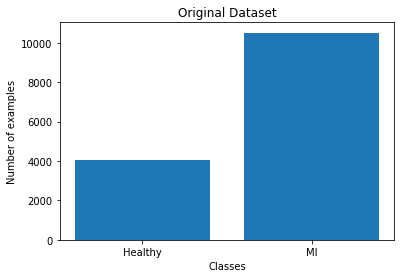

In [36]:
C0 = np.argwhere(y_ptbdb_model == 0).flatten()
C1 = np.argwhere(y_ptbdb_model == 1).flatten()
print("Old sizes classes dataset: [LR: {}, HR: {}]".format(len(C0),len(C1)))

x = np.arange(2)
plt.bar(x,[len(C0), len(C1)])
plt.title("Original Dataset")
plt.xticks(x, ('Healthy', 'MI'))
plt.xlabel("Classes")
plt.ylabel("Number of examples")
plt.show()

#### Mean example visualization by class

Text(0, 0.5, 'Amplitude')

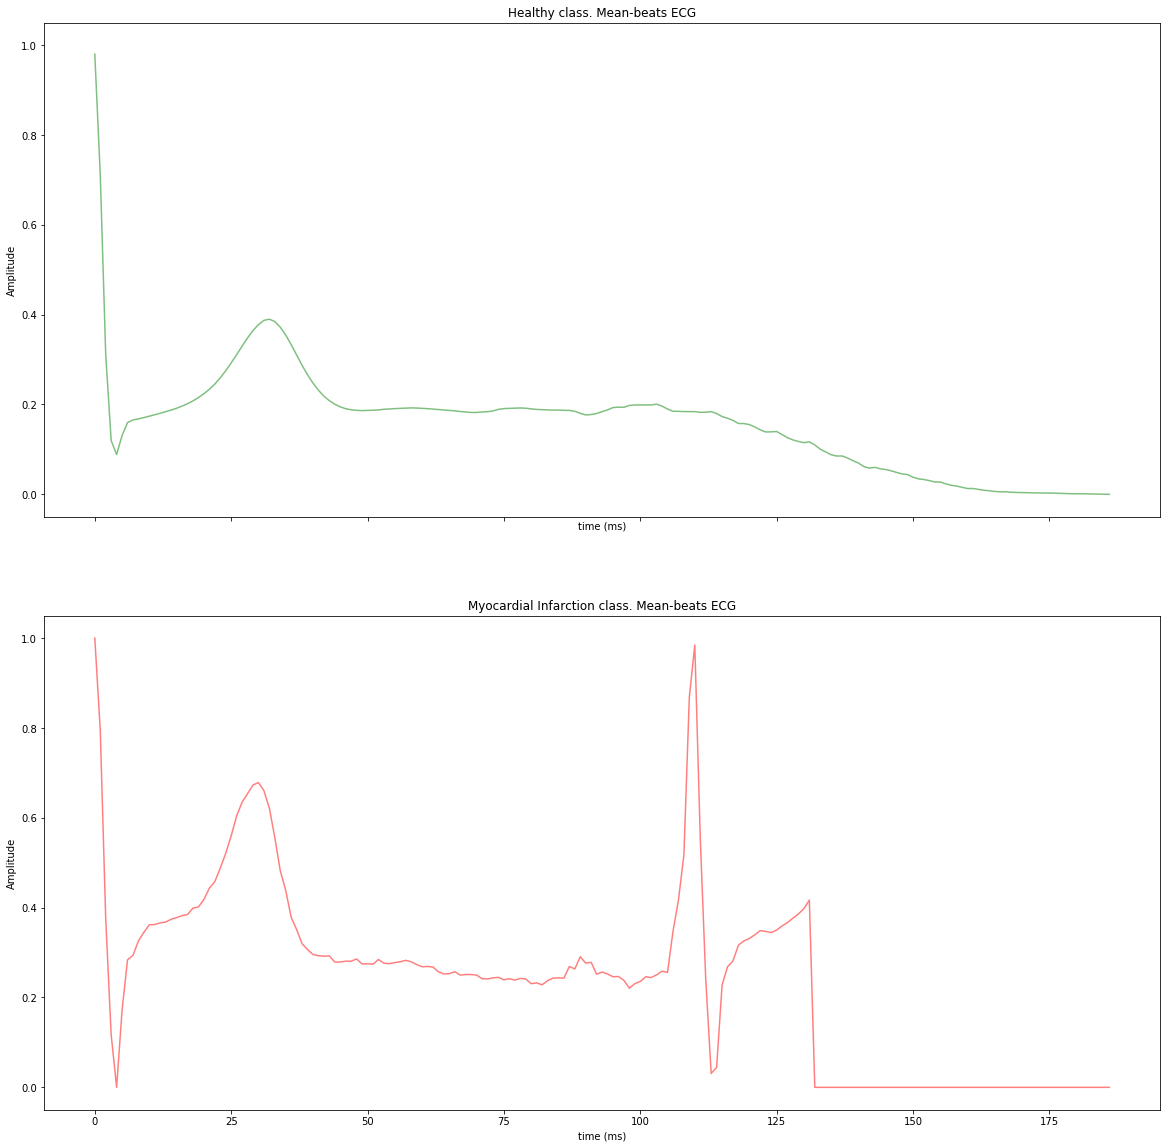

In [37]:
f, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(20,20))

ax[0].set_title("Healthy class. Mean-beats ECG")
ax[0].plot(X_mean_ptbdb_model[0, :], color="green", alpha=.5)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Amplitude')

ax[1].set_title("Myocardial Infarction class. Mean-beats ECG")
ax[1].plot(X_ptbdb_model[1, :], color="red", alpha=.5)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Amplitude')

#### 10 examples visualization by class

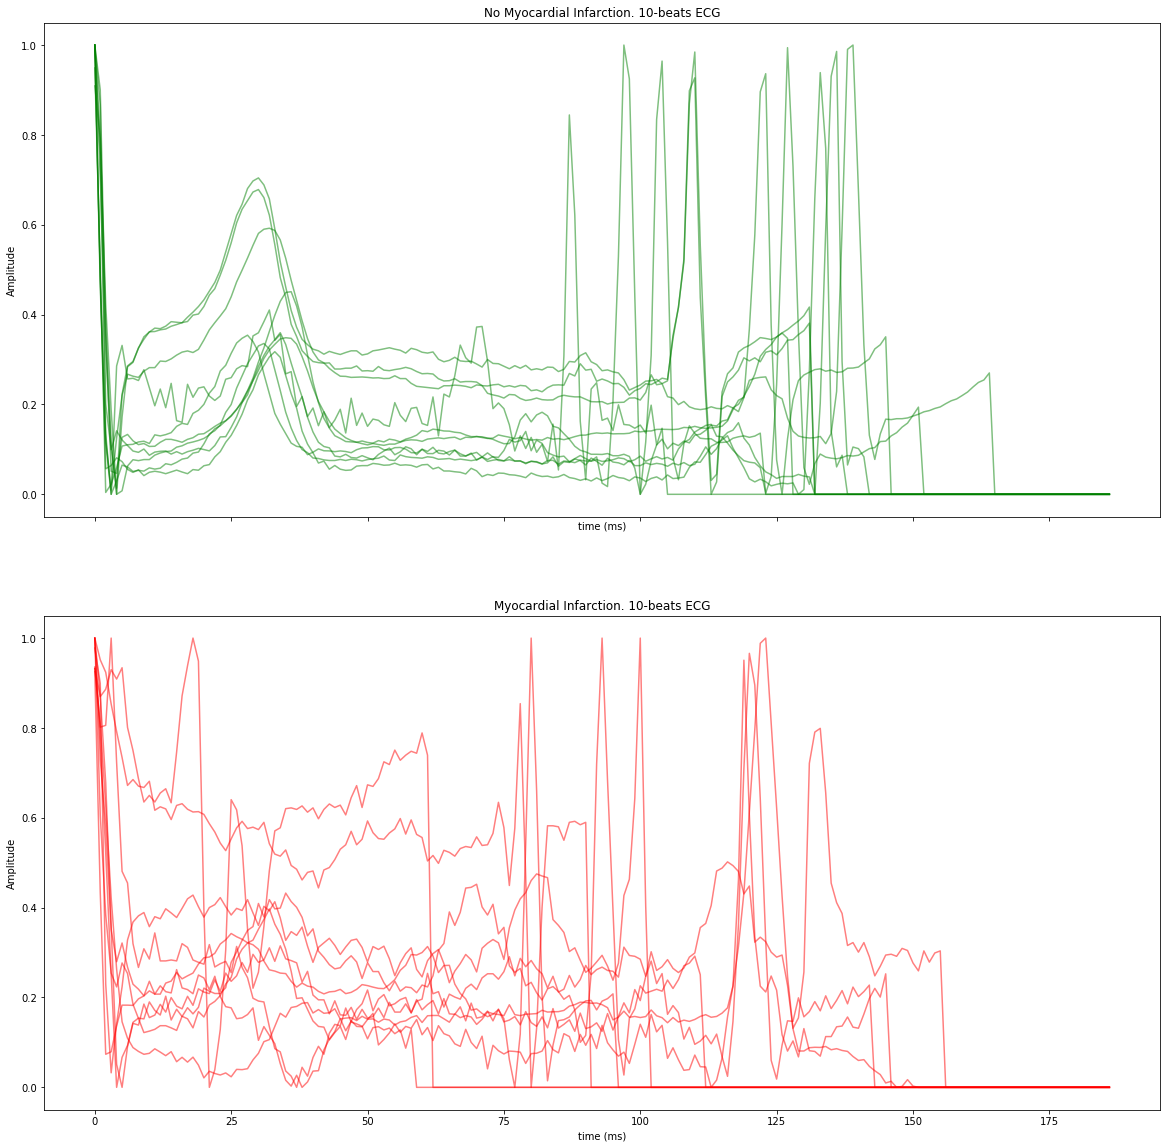

In [38]:
plots_per_class=10

f, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(20,20))

for j in range(plots_per_class):
    ax[0].set_title("No Myocardial Infarction. {}-beats ECG".format(plots_per_class))
    ax[0].plot(X_ptbdb_model[C0, :][j], color="green", alpha=.5)
    ax[0].set_xlabel('time (ms)')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].set_title("Myocardial Infarction. {}-beats ECG".format(plots_per_class))
    ax[1].plot(X_ptbdb_model[C1, :][j], color="red", alpha=.5)
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('Amplitude')

#### Visual comparison between an example by class

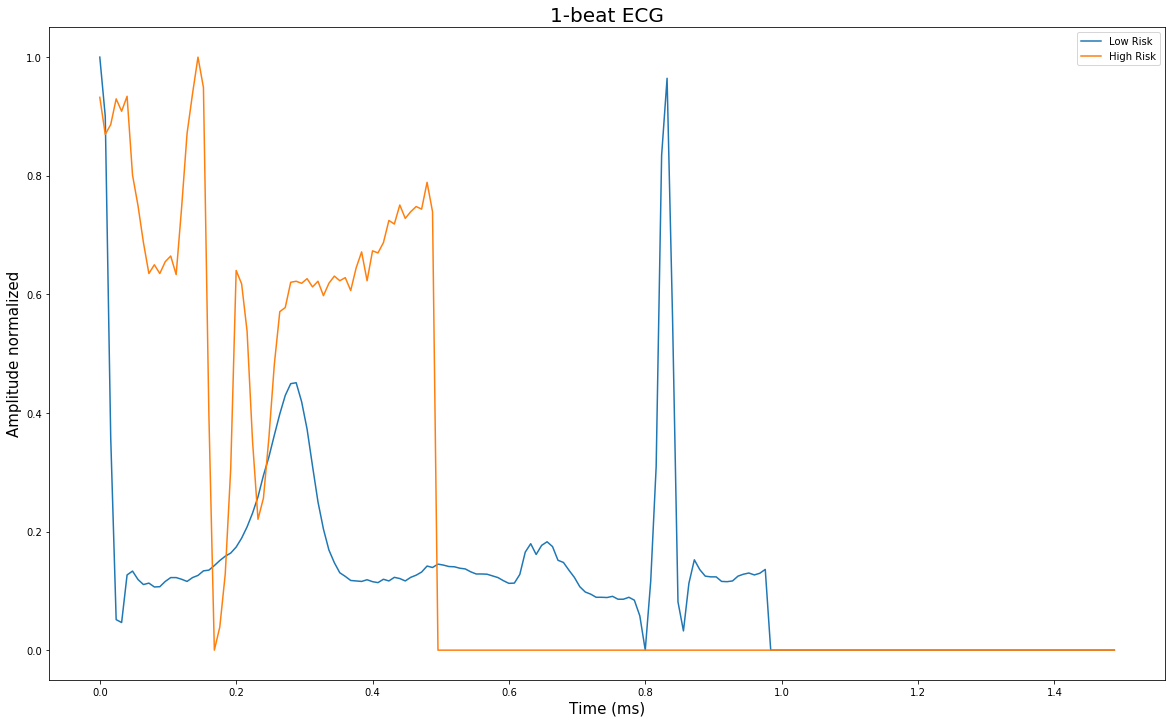

In [39]:
x = np.arange(0, 187)*8/1000
plt.figure(figsize=(20,12))
plt.plot(x, X_ptbdb_model[C0, :][0], label="Low Risk")
plt.plot(x, X_ptbdb_model[C1, :][0], label="High Risk")
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude normalized", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

## Preprocessing Data

### Split data into training and testing dataset

In [40]:
from preprocess_data import train_testbalanced_split

model = 1
classes = [C0, C1]
test_size = 0.02
random_state = 42

X_train_ptbdb_model, X_test_ptbdb_model, y_train_ptbdb_model, y_test_ptbdb_model = train_testbalanced_split(X_ptbdb_model, y_ptbdb_model, model, classes, test_size, random_state)

print("X_train", X_train_ptbdb_model.shape)
print("y_train", y_train_ptbdb_model.shape)
print("X_test", X_test_ptbdb_model.shape)
print("y_test", y_test_ptbdb_model.shape)

X_train (13985, 187)
y_train (13985,)
X_test (582, 187)
y_test (582,)


Sizes classes original dataset: [C0: 4046, C1: 10506]
Sizes classes training dataset: [C0: 3767, C1: 10218]
Sizes classes testing dataset: [C0: 291, C1: 291]


<BarContainer object of 2 artists>

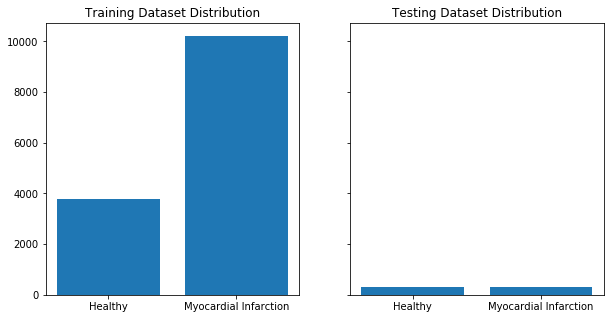

In [41]:
C0_test = np.argwhere(y_test_ptbdb_model == 0).flatten()
C1_test = np.argwhere(y_test_ptbdb_model == 1).flatten()

C0_train = np.argwhere(y_train_ptbdb_model == 0).flatten()
C1_train = np.argwhere(y_train_ptbdb_model == 1).flatten()

print("Sizes classes original dataset: [C0: {}, C1: {}]".format(len(C0),len(C1)))
print("Sizes classes training dataset: [C0: {}, C1: {}]".format(len(C0_train),len(C1_train)))
print("Sizes classes testing dataset: [C0: {}, C1: {}]".format(len(C0_test),len(C1_test)))


f, ax = plt.subplots(1, 2, sharey=True, figsize=(10 ,5))
ax[0].set_title("Training Dataset Distribution")
ax[0].bar(('Healthy', 'Myocardial Infarction'), [len(C0_train), len(C1_train)])
ax[1].set_title("Testing Dataset Distribution")
ax[1].bar(('Healthy', 'Myocardial Infarction'), [len(C0_test), len(C1_test)])

### Data balance algorithm

In [42]:
from preprocess_data import data_augmentation
from imblearn.under_sampling import RandomUnderSampler

X_train_ptbdb_model, y_train_ptbdb_model = data_augmentation(X_train_ptbdb_model, y_train_ptbdb_model, X_train_ptbdb_model[C0_train], 'C0', 2)

rus = RandomUnderSampler(sampling_strategy='all')
X_train_ptbdb_model, y_train_ptbdb_model = rus.fit_resample(X_train_ptbdb_model, y_train_ptbdb_model)

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1743: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1745: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


Old sizes classes training dataset: [C0: 3767, C1: 10218]
New sizes classes training dataset: [C0: 10218, C1: 10218]


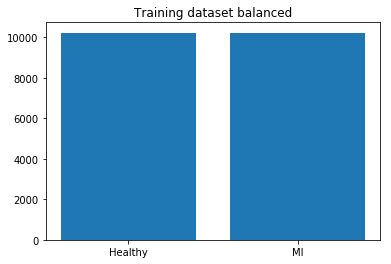

In [43]:
C0_new_train = np.argwhere(y_train_ptbdb_model == 0).flatten()
C1_new_train = np.argwhere(y_train_ptbdb_model == 1).flatten()

print("Old sizes classes training dataset: [C0: {}, C1: {}]".format(len(C0_train),len(C1_train)))
print("New sizes classes training dataset: [C0: {}, C1: {}]".format(len(C0_new_train),len(C1_new_train)))

x = np.arange(2)
plt.bar(x,[len(C0_new_train), len(C1_new_train)])
plt.title("Training dataset balanced")
plt.xticks(x, ('Healthy', 'MI'))
plt.show()

### Split training dataset into training and validation dataset

In [44]:
from sklearn.model_selection import train_test_split

valid_size = 0.05
X_train_ptbdb_model, X_valid_ptbdb_model, y_train_ptbdb_model, y_valid_ptbdb_model = train_test_split(X_train_ptbdb_model, y_train_ptbdb_model, test_size=valid_size, random_state=random_state)

Sizes classes original dataset: [C0: 4046, C1: 10506]
Sizes classes training dataset: [C0: 9696, C1: 9718]
Sizes classes validation dataset: [C0: 522, C1: 500]


<BarContainer object of 2 artists>

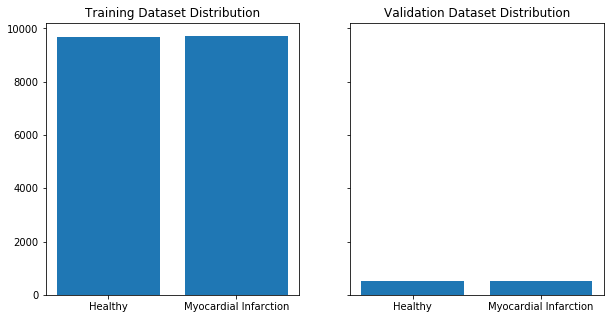

In [45]:
C0_valid = np.argwhere(y_valid_ptbdb_model == 0).flatten()
C1_valid = np.argwhere(y_valid_ptbdb_model == 1).flatten()

C0_train_final = np.argwhere(y_train_ptbdb_model == 0).flatten()
C1_train_final = np.argwhere(y_train_ptbdb_model == 1).flatten()

print("Sizes classes original dataset: [C0: {}, C1: {}]".format(len(C0),len(C1)))
print("Sizes classes training dataset: [C0: {}, C1: {}]".format(len(C0_train_final),len(C1_train_final)))
print("Sizes classes validation dataset: [C0: {}, C1: {}]".format(len(C0_valid),len(C1_valid)))


f, ax = plt.subplots(1, 2, sharey=True, figsize=(10 ,5))
ax[0].set_title("Training Dataset Distribution")
ax[0].bar(('Healthy', 'Myocardial Infarction'), [len(C0_train_final), len(C1_train_final)])
ax[1].set_title("Validation Dataset Distribution")
ax[1].bar(('Healthy', 'Myocardial Infarction'), [len(C0_valid), len(C1_valid)])

## Implementation: 1D CNN + NN model

### Preprocess data for input to the Neural Network

In [46]:
from preprocess_data import preprocess_input
X_train_ptbdb_model_nn, X_valid_ptbdb_model_nn, X_test_ptbdb_model_nn, y_train_ptbdb_model_nn, y_valid_ptbdb_model_nn, y_test_ptbdb_model_nn = preprocess_input(X_train_ptbdb_model, X_valid_ptbdb_model, X_test_ptbdb_model, y_train_ptbdb_model, y_valid_ptbdb_model, y_test_ptbdb_model)

print("X_train", X_train_ptbdb_model_nn.shape)
print("y_train", y_train_ptbdb_model_nn.shape)
print("X_test", X_test_ptbdb_model_nn.shape)
print("y_test", y_test_ptbdb_model_nn.shape)
print("X_valid", X_valid_ptbdb_model_nn.shape)
print("y_valid", y_valid_ptbdb_model_nn.shape)

X_train (19414, 187, 1)
y_train (19414, 2)
X_test (582, 187, 1)
y_test (582, 2)
X_valid (1022, 187, 1)
y_valid (1022, 2)


/home/fylgja/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Model

In [47]:
from keras.models import Model, Sequential
from keras.layers import Input, concatenate, Flatten

mitbih_model.load_weights('saved_models/mitbih_model/weights.best.from_scratch.hdf5')

extract_features.trainable = False
ptbdb_model_nn = full_connect_NN(extract_features, 2)

ptbdb_model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 64)                51712     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
_________________________________________________________________
softmax_2 (Softmax)          (None, 2)                 0         
Total params: 54,114
Trainable params: 2,274
Non-trainable params: 51,840
_________________________________________________________________


### Training

In [48]:
from keras.optimizers import Adam
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
ptbdb_model_nn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [49]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

epochs = 100
batch_size = 500

checkpointer = ModelCheckpoint(filepath='saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

lrate = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.0001)

early = EarlyStopping(monitor="val_loss", mode="min", patience=25)

callbacks_list = [checkpointer, lrate, early]

ptbdb_model_nn.fit(X_train_ptbdb_model_nn, y_train_ptbdb_model_nn,
          epochs=epochs, batch_size=batch_size, verbose=1, 
          validation_data=(X_valid_ptbdb_model_nn, y_valid_ptbdb_model_nn), 
          callbacks=callbacks_list)

Train on 19414 samples, validate on 1022 samples
Epoch 1/100
19414/19414 [==============================] - 3s 176us/step - loss: 0.4649 - acc: 0.7818 - val_loss: 0.3629 - val_acc: 0.8474

Epoch 00001: val_loss improved from inf to 0.36286, saving model to saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5
Epoch 2/100
19414/19414 [==============================] - 3s 147us/step - loss: 0.3574 - acc: 0.8408 - val_loss: 0.3180 - val_acc: 0.8611

Epoch 00002: val_loss improved from 0.36286 to 0.31798, saving model to saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5
Epoch 3/100
19414/19414 [==============================] - 3s 147us/step - loss: 0.3296 - acc: 0.8506 - val_loss: 0.2995 - val_acc: 0.8679

Epoch 00003: val_loss improved from 0.31798 to 0.29953, saving model to saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5
Epoch 4/100
19414/19414 [==============================] - 3s 148us/step - loss: 0.3176 - acc: 0.8536 - val_loss: 0.2917 - val_acc: 0.8718

Ep

19414/19414 [==============================] - 3s 147us/step - loss: 0.3030 - acc: 0.8600 - val_loss: 0.2759 - val_acc: 0.8669

Epoch 00037: val_loss did not improve from 0.27361

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
Epoch 38/100
19414/19414 [==============================] - 3s 147us/step - loss: 0.3026 - acc: 0.8609 - val_loss: 0.2754 - val_acc: 0.8699

Epoch 00038: val_loss did not improve from 0.27361
Epoch 39/100
19414/19414 [==============================] - 3s 150us/step - loss: 0.3017 - acc: 0.8607 - val_loss: 0.2754 - val_acc: 0.8669

Epoch 00039: val_loss did not improve from 0.27361
Epoch 40/100
19414/19414 [==============================] - 3s 149us/step - loss: 0.3014 - acc: 0.8613 - val_loss: 0.2736 - val_acc: 0.8689

Epoch 00040: val_loss improved from 0.27361 to 0.27359, saving model to saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5
Epoch 41/100
19414/19414 [==============================] - 3s 148us/step - loss: 0.

### Evaluation and Validation

In [50]:
ptbdb_model_nn.load_weights('saved_models/ptbdb_model_nn/weights.best.from_scratch.hdf5')
y_pred_ptbdb_model_nn = ptbdb_model_nn.predict(X_test_ptbdb_model_nn, batch_size=1000)
pred_Y_cat_ptbdb_model_nn = np.argmax(y_pred_ptbdb_model_nn,-1)
test_Y_cat_ptbdb_model_nn = np.argmax(y_test_ptbdb_model_nn.toarray(), -1)

                       precision    recall  f1-score   support

              Healthy       0.86      0.74      0.79       291
Myocardial Infarction       0.77      0.88      0.82       291

            micro avg       0.81      0.81      0.81       582
            macro avg       0.81      0.81      0.81       582
         weighted avg       0.81      0.81      0.81       582



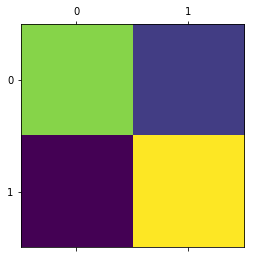

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
plt.matshow(confusion_matrix(test_Y_cat_ptbdb_model_nn, pred_Y_cat_ptbdb_model_nn))
print(classification_report(test_Y_cat_ptbdb_model_nn, pred_Y_cat_ptbdb_model_nn, target_names=['Healthy', 'Myocardial Infarction']))

In [52]:
from sklearn.metrics import accuracy_score
print("Average accuracy : {:.3f}".format(accuracy_score(test_Y_cat_ptbdb_model_nn, pred_Y_cat_ptbdb_model_nn)))

Average accuracy : 0.808


## Implementation: 1D CNN + SVM model

### Model

In [53]:
from sklearn.svm import SVC

train_features = extract_features.predict(X_train_ptbdb_model_nn)

svm = SVC(gamma='scale')

### Training

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
parameters = {'kernel':('linear', 'rbf'), 'C':list(range(65,75))}
scorer = make_scorer(recall_score)

gridsearch_svm = GridSearchCV(svm, parameters, cv=5)
gridsearch_svm.fit(train_features, y_train_ptbdb_model)

ptbdb_model_svm = gridsearch_svm.best_estimator_

ptbdb_model_svm.fit(train_features, y_train_ptbdb_model)

SVC(C=65, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
ptbdb_model_svm = SVC(C=74, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
ptbdb_model_svm.fit(train_features, y_train_ptbdb_model)

SVC(C=74, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluation and Validation

In [56]:
from sklearn.metrics import accuracy_score

test_features = extract_features.predict(X_test_ptbdb_model_nn)
y_pred_ptbdb_model_svm = ptbdb_model_svm.predict(test_features)

                       precision    recall  f1-score   support

              Healthy       0.99      0.98      0.98       291
Myocardial Infarction       0.98      0.99      0.98       291

            micro avg       0.98      0.98      0.98       582
            macro avg       0.98      0.98      0.98       582
         weighted avg       0.98      0.98      0.98       582



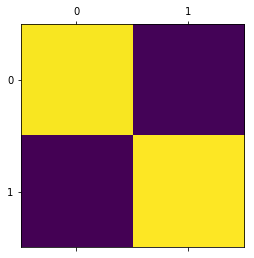

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

pred_Y_cat_ptbdb_model_svm = y_pred_ptbdb_model_svm
test_Y_cat_ptbdb_model_svm = np.argmax(y_test_ptbdb_model_nn.toarray(), -1)


plt.matshow(confusion_matrix(test_Y_cat_ptbdb_model_svm, pred_Y_cat_ptbdb_model_svm))
print(classification_report(test_Y_cat_ptbdb_model_svm, pred_Y_cat_ptbdb_model_svm, target_names=['Healthy', 'Myocardial Infarction']))

In [58]:
from sklearn.metrics import accuracy_score
print("Average accuracy : {:.3f}".format(accuracy_score(test_Y_cat_ptbdb_model_svm, pred_Y_cat_ptbdb_model_svm)))

Average accuracy : 0.985


## Free-Form Visualization

In [59]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(train_features)

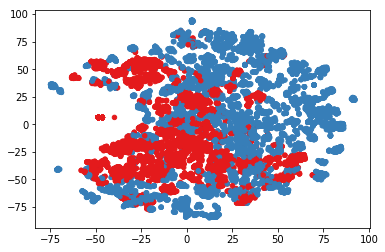

In [60]:
CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(2)]
NAME_DIC = {k:v for k,v in zip([0,1],['N','MI'])}
color=[COLOR[int(y)] for y in y_train_ptbdb_model]
markersizes = [20 for _ in range(train_features.shape[0])]

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=CMAP, s=markersizes)